<a href="https://colab.research.google.com/github/AiSamdasu/ML_Study/blob/main/1_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B8%B0%EC%B4%88(with_KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분류 (classification) 문제
- 여러개의 종류(class) 중 하나를 구별해 내는 문제
- 이진 분류(binary classification) : 2개의 class중 하나를 고르는 문제

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# 생선의 분류 문제
- 캐글의 공개 데이터 사용

In [3]:
base_path = r'/content/drive/MyDrive/개인폴더/AI 자연어 처리 /dataset'

In [5]:
file_path = os.path.join(base_path, 'fish.csv')
fish_df = pd.read_csv(file_path)
fish_df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [6]:
fish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


## 컬럼 정보<br>
 - Species  -> 생선의 종류 (분류형) <br>
 - Weight  -> 생선의 무게 (수치형)<br>
 - Length  -> 생선의 길이 (수치형)<br>
 - Diagonal -> 생선의 대각선 길이 (수치형)<br>
 - Height  -> 생선의 크기 (수치형)

In [8]:
# 어떤 종류가 있는지 확인
fish_df['Species'].unique()
# fish_df.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

### Species(종류) 학술 사전
- Perch '농어'
- Bream '도미'
- Roach '로치, Common Roach 잉어과 담수어'
- Pike '강꼬치고기, Northern pike'
- Smelt '빙어'
- Parkki '청돔'
- Whitefish '송어'

In [9]:
fish_df['Species'].value_counts()

,count
Species,
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


## Fish(생선) 분류 (classification) 문제

- 생선의 **길이(length)**와 **무게(weight)**로 **생선의 종류(species)** 자동 분류
- 분류할 생선 (이진분류 연습)
  - Bream '도미'
  - Smelt '빙어'

In [17]:
# 도미 데이터 준비

# 종이 도미인 것 분류
# 동일 코드 # fish_df[fish_df.Species == 'Bream']
bream_df = fish_df[fish_df['Species'] == 'Bream']

# 길이
bream_length = bream_df['Length'].to_list() # 추출후 리스트로 변환

# 무게
bream_weight = bream_df['Weight'].to_list()

In [23]:
# 빙어 데이터 준비

# 종이 빙어인 것 분류
smelt_df = fish_df[fish_df['Species'] == 'Smelt']

# 길이
smelt_length = smelt_df['Length'].to_list()
# 무게
smelt_weight = smelt_df['Weight'].to_list()

In [28]:
print("Bream : ")
print("length : ",bream_length)
print("weight : ",bream_weight)
print()

print("Smelt : ")
print("length : ", smelt_length)
print("weight : ", smelt_weight)

Bream : 
length :  [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
weight :  [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

Smelt : 
length :  [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
weight :  [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


# feature
- 데이터의 특징/ 특성
- 데이터를 표현하는 성질
- 정형 데이터에서 column 을 feature라 함

<hr>

- 위 예시에서 '길이(length)' 와 '무게(weight)' 가 생선 데이터의 특징(feature) 임

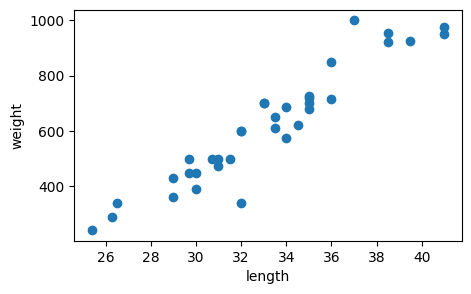

In [33]:
# feature 시각화

# figure() -> 캔버스를 만든다 (캔버스 크기를 조절)
# scatter() -> 캔버스 위에 그림을 그린다

# bream(도미) 데이터 시각화
plt.figure(figsize=(5, 3))  # 가로 5, 세로 3 인치 크기로 설정
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

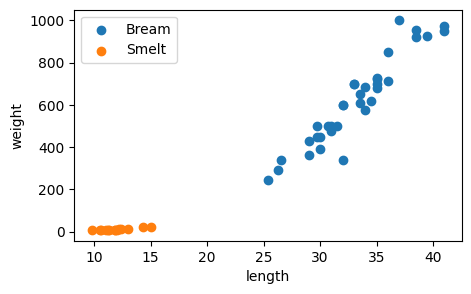

In [38]:
# 두 생선의 데이터 분포를 한번에 시각화
# scatter() 을 2번 사용하여 같은 캔버스에 2번 그림

plt.figure(figsize=(5, 3))

plt.scatter(bream_length, bream_weight, label='Bream')
plt.scatter(smelt_length, smelt_weight, label='Smelt')

plt.xlabel('length')
plt.ylabel('weight')
plt.legend() # 어떤것을 의미하는지 박스로 표시
plt.show()

왼쪽 하단이 빙어의 산점도 데이터 <br>
<br>
1. 빙어(Smelt)가 도미(Bream)에 비해 length, weight 둘다 작다 <br>
<br>
연관 정도 : <br>
length와 weight가 비례하지만, 늘어나는 정도가 다름 <br>
1. Smelt 는 상대적으로 weight가 length에 영향을 덜 받는다는 것을 알수있음


# 머신러닝의 입력(input) 데이터 준비
- feature vector 형태로 준비해야함

# KNN (k-Nearest Neighbors (k-최근접 이웃)) 알고리즘
어떤 데이터에 대한 답을 구할때, **'주변의 다른 데이터'** 를 보고 **'다수를 차지하는 것을 정답'** 으로 사용함 <br>
다른 알고리즘과 다르게 데이터만 있으면 됨 (다양한 파라미터 필요 X)
<br><br>
<hr>
KNN을 사용해 Smelt와 Bream 구분
<hr>

**KNeighborsClassifier**

```python
class sklearn.neighbors.KNeighborsClassifier(
  n_neighbors=5,
  *,
  weights='uniform',
  algorithm='auto',
  leaf_size=30,
  p=2,
  metric='minkowski',
  metric_params=None,
  n_jobs=None
  )
```


## feature vector
사이킷런에서 'data'를 각 '특성(feature)들'의 '배열' 형태로 만들어야함 -> 2차원 배열<br>
<br>
아래 예시에서 feature 는 length, weight 이다
<br>
<br>
2차원 리스트(feature vector) <br>
[ <br>
[ 길이1, 무게1 ],<br>
[ 길이2, 무게2 ],<br>
[ 길이3, 무게3 ],<br>
...<br>
]
<br><br>
위 과정을 '입력(input)' 또는 'feature vector' 이라 함
<br><br>
대부분 프레임워크에서 이러한 방식 사용

In [40]:
# Smelt와 Bream 데이터 합치기 -> 리스트 끼리 연산
length = bream_length + smelt_length
weight = bream_weight + smelt_weight



In [45]:
# zip을 통해 리스트 2개를 하나의 feature vector로 만듦
fish_data = [[l, w] for l,w in zip(length, weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


## 머신러닝의 답안 준비
- 지도학습 (supervised learning) 에선 입력데이터에 대한 **답안**이 필요함
- 이를 **label(레이블)** 또는 **target(타킷)** 이라 함
- ML알고리즘은 기본적으로 이를 계산 가능한 '숫자' 형태로 알려줘야함
<hr>
- 이진분류에서 문제에서 0값의 클래스를 '음성클래스', 1값의 클래스를 '양성클래스' 라고 함
<hr>
일반적으로<br>
입력 data를 'x'로, target(label)을 'y'로 표기함 <br>
특히 입력 data는 'feature 들의 vector' 라서 대문자 'X' 로 표시함

In [47]:
# 답안 : Bream 을 1, Smelt는 0으로 표시하였음
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# 머신러닝 모델 준비
> 모델(model)이란 <br>
머신러닝 알고리즘을 구현한 프로그램, <br>
혹은, 프로그램은 아니더라도 알고리즘을 (수식 등으로) 구체화 하여 표현한 것
<hr>
모델(model)은 적용되는 알고리즘이다.

In [49]:
# KNN 알고리즘 사용
from sklearn.neighbors import KNeighborsClassifier # KNN 분류 모델
kn = KNeighborsClassifier() # 분류 모델 객체 생성

scikit-learn(사이킷런) 에서 지도학습의 모델을 estimator 라고 통칭함. <br>
그중 '분류' 모델을 classifier 이라 하며, 변수명을 'clf' 또는 'kn' 으로 작성하는 경우가 많음
<hr>

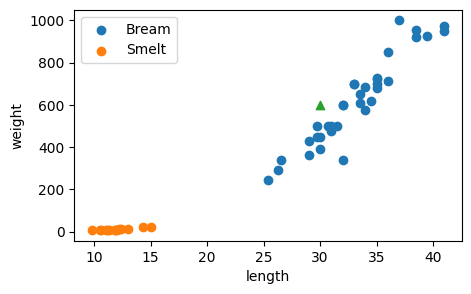

In [53]:
# length: 30, weight: 600 <- bream or smelt ?
plt.figure(figsize=(5, 3))

plt.scatter(bream_length, bream_weight, label='Bream')
plt.scatter(smelt_length, smelt_weight, label='Smelt')
plt.scatter(30, 600, marker='^') # 어느 위치에 있는지 확인
# KNN 알고리즘은 가까운 곳을 정답으로 함

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

### 모델 학습하기
- 이 과정을 **training(훈련)** 혹은 **fitting(적합)** 한다 함
- 주어진 모델에, 주어진 데이터를 통해 규칙을 찾아가는 과정
- 모델 알고리즘을 구성하는 각종 파라미터(parameter)값들이 입력된 데이터를 학습하면서 최적의 값으로 변화되어 감

In [55]:
# 학습
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

# 학습한 결과 : 정확도(accuracy)
- 얼마나 잘 학습했는지 점수로 확인
- **score(data, target)** => 0.0 ~ 1.0 사이의 값 -> 1.0은 100% 맞춘다는 의미임


In [56]:
kn.score(fish_data, fish_target)

1.0

## 학습된 모델을 통해 예측(predict)하기
### predict()
- 학습한 모델에 새로이 '관측'된 데이터를 넣어 예측 결과 return
- 예측에는 target 값이 필요 없음
- predict()의 입력데이터도 'feature 들의 배열(2차원 배열)' 로 넣어주어야 함
- return값은 '예측값들의 배열'  

In [57]:
# 30, 600을 예측
# KNN class 에서 n_neighbors = 5이므로 주변 5개의 값 참고
kn.predict([[30, 600]])

array([1])

In [59]:
kn.predict([
    [30, 600],
    [16,30],
])

array([1, 0])

# KNN 의 주요 속성

 KNN 특징 :<br>
장점 : 데이터만 있으면 됨. <br>
단점 : 데이터가 너무 많으면 사용하기 힘들다 (많은 메모리, 많은 거리 계산, ...)

<hr>

*KNeighborsClassifier의 속성중* <br>

**_fit_X** : 전달한 data들을 가지고 있음 <br>

**_y** : 전달한 target 값들을 가지고 있음


In [62]:
# 전달한 data 확인
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [63]:
# 전달한 target값 확인
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


실제로 KNN 알고리즘은 딱히 무언가 train 되는게 없음. <br><br>
fit() 에 전달한 데이터를 저장하고 있다가 새로운 데이터가 등장하면 가장 '가까운 데이터들' 을 참고하여 구분함. <br><br>
참고하는 가까운 값의 개수는 n_neighbors 값으로 정해줄수있음 (기본값 : 5)
<hr>

In [64]:
# 기본값 5개 대신 49개를 참고
kn49 = KNeighborsClassifier(n_neighbors=49) # 49개 참고

# fish_data 49개중 도미(Bream)가 35개를 차지함, 따라서 어떠한 데이터가 와도 '도미(Bream)'로 예측함 -> 도미의 개수가 더 많기 때문 (true, false 개념이 아님)
# 오히려 정확도가 떨어짐

In [69]:
# 정확도 떨어지는것 확인
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)
# 35/(35 + 14) == 0.7142857142857143
# 결론 : KNN 에서 n_neighbors 값이 너무 많게 되면 정확도가 떨어질 수 있음

0.7142857142857143

In [68]:
print(35/49) # 도미의 개수/전체 개수

0.7142857142857143
